[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/OpenCV.ipynb)

In [2]:
import urllib.request as req
url="http://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url,"test.png")
import cv2
img=cv2.imread("test.png")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


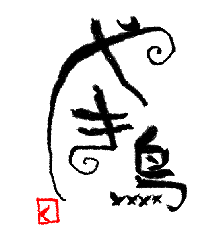

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
img=cv2.imread("test.png")
plt.axis("off")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()